In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline  
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
os.getcwd()

'C:\\Users\\tomas\\ML\\regresion lineal'

In [3]:
path = 'data\\USA_Housing.csv'
#'C:\\Users\\tomas\\ML\\cluster\\Scripts\\data'

df = pd.read_csv(path)
df.head(5)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
#chequeamos nulos 
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
#quito las variables categoricas 
df2 = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population', 'Price' ]]
df2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


<Axes: >

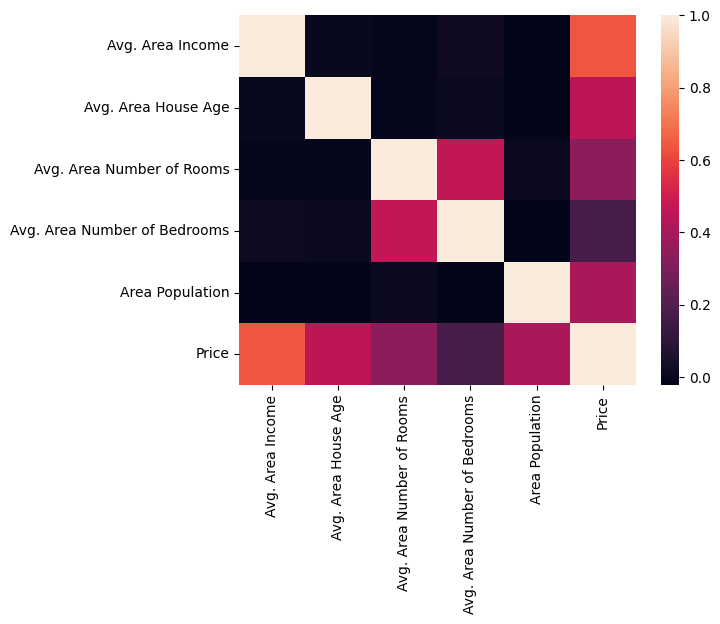

In [6]:
# heatmap de correlaciones
sns.heatmap(df2.corr())

In [7]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [8]:

# Split up the data into a training set
#random state es una vaor semilla para hacer la separaciion. Hace que cada vez que lo ejecutemos los conjuntos de entrenaiento y tes sean los mismos 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train) 

LinearRegression()

In [15]:
print(lm.intercept_)

-2640159.796852963


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [26]:
y_pred = lm.predict(X_test)
y_pred

array([1260960.70567628,  827588.75560322, 1742421.24254349, ...,
        372191.40626905, 1365217.15140899, 1914519.54178899],
      shape=(2000,))

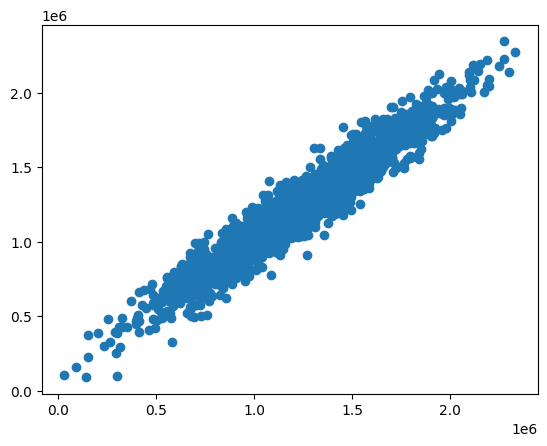

In [27]:
# y estimada vs y real
plt.scatter(y_test,y_pred)

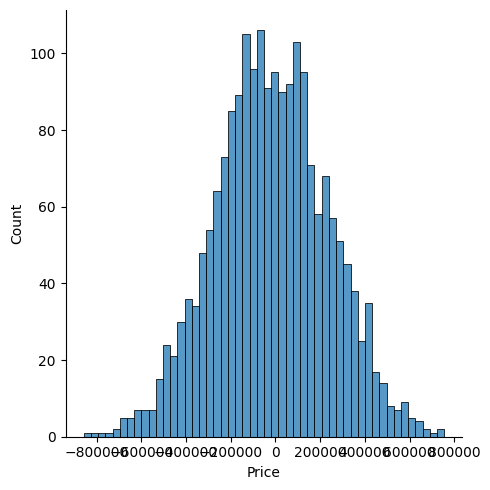

In [51]:
# histograma de residuales
sns.displot((y_test-y_pred),bins=50);

## Regression Evaluation Metrics

Metricas de error 

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los cuadrados de los errores:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raiz cuadradade los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


In [22]:
#metricas
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914945
MSE: 10460958907.208805
RMSE: 102278.82922290813


In [23]:
r2_tr = lm.score(X_train, y_train)
print("R^2:", r2)

R^2: 0.9181223200568411


In [34]:
r2_ts = lm.score(X_test, y_test)
print("R^2:", r2)

R^2: 0.9176824009649255


In [33]:
r2_=r2_score(y_test, y_pred)
r2_

0.9176824009649255

#### Cuando el numero de variables input es muy grande se puede emplear SGDregrressor que aplica el metrodo del gradiente para encontrar el optimo.

**- constant (Constante):**
La tasa de aprendizaje permanece fija durante todo el entrenamiento.
Se especifica con el parámetro eta0, que define su valor constante.  
**- optimal (Adaptativa):**
Calcula automáticamente una tasa de aprendizaje óptima en función de las iteraciones y los datos de entrenamiento.  
**- invscaling (Escalado inverso):**
Reduce la tasa de aprendizaje a medida que aumenta el número de iteraciones.  
**- adaptive (Adaptativo moderno):**
Reduce la tasa de aprendizaje únicamente cuando no mejora el error durante varias iteraciones consecutivas. Este es un método más reciente, útil en ciertos escenarios.  

In [42]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=10000, learning_rate='optimal', penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_=r2_score(y_test, y_pred)
r2_

-3.148077776291439e+27

El resultado es malo, vamos a hacer un gridsearch para optimizar los parámetros

In [45]:
from sklearn.model_selection import GridSearchCV
sgd = SGDRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'loss': ['squared_error', 'huber'],  # Tipos de función de pérdida
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularización
    'alpha': [0.0001, 0.001, 0.01],  # Fuerza de la regularización
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Tipos de tasa de aprendizaje
    'eta0': [0.01, 0.1, 1.0]  # Tasa de aprendizaje inicial
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 pliegues
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1  # Mostrar progreso
)


In [47]:

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación (MSE negativo):", grid_search.best_score_)

# Evaluar en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_=r2_score(y_test, y_pred)
print("R2:", r2_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros encontrados: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'huber', 'penalty': 'l1'}
Mejor puntuación (MSE negativo): -61309754536.32391
R2: 0.49464067019334446


In [48]:
print(best_model.intercept_)

[-0.1797289]


In [49]:
print(best_model.intercept_)
coeff_df = pd.DataFrame(best_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,12.888482
Avg. Area House Age,1.215685
Avg. Area Number of Rooms,1.278860
Avg. Area Number of Bedrooms,0.904062
Area Population,10.187747


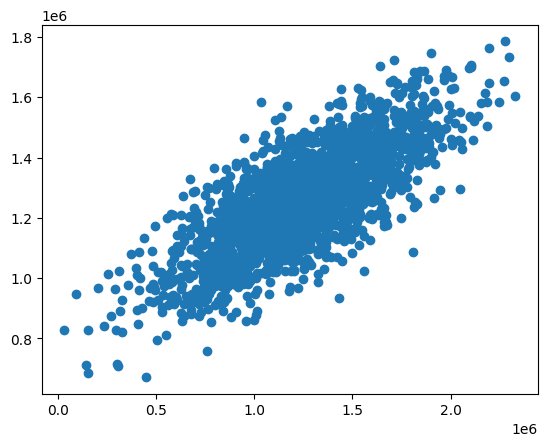

In [50]:
plt.scatter(y_test,y_pred)

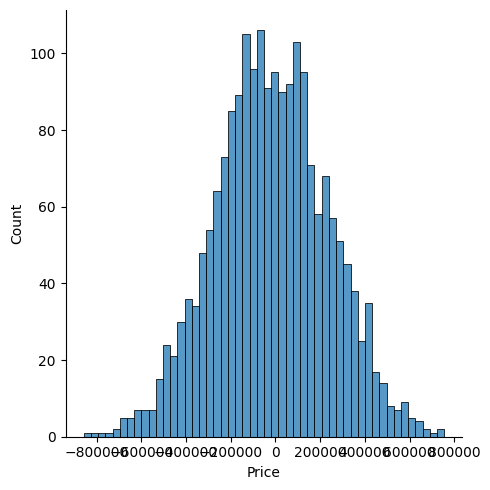

In [52]:
# histograma de residuales
sns.displot((y_test-y_pred),bins=50);

#### Probamos ahora lasso y ridge, aunque con SGDREgressor se puede hacer indicando pentalty L1 o L2.

In [55]:
from sklearn.linear_model import Ridge, Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import mean_squared_error

# Ridge
ridge = Ridge(alpha=1.0)  # 'alpha' es el parámetro de regularización equivalente a 'lambda'
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
r2_=r2_score(y_test, y_pred_ridge)
print("R2:", r2_)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
r2_=r2_score(y_test, y_pred_lasso)
print("R2:", r2_)

Ridge MSE: 10089716572.554762
R2: 0.9179914220241199
Lasso MSE: 10089010510.994362
R2: 0.9179971608478139


In [56]:
print(ridge.intercept_)
coeff_df = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

-2634603.83134852


,Coefficient
Avg. Area Income,21.652123
Avg. Area House Age,164624.137539
Avg. Area Number of Rooms,119585.966102
Avg. Area Number of Bedrooms,2454.734742
Area Population,15.270255


In [57]:
print(lasso.intercept_)
coeff_df = pd.DataFrame(lasso.coef_,X.columns,columns=['Coefficient'])
coeff_df

-2635071.583212803


,Coefficient
Avg. Area Income,21.652206
Avg. Area House Age,164666.378500
Avg. Area Number of Rooms,119623.932897
Avg. Area Number of Bedrooms,2440.341894
Area Population,15.270313


#### Regresión polinómica
La regresion polinomica en el fondo se rtrata de una regresion lineal donde hemos añadido features nuevas que son las actuales evelvas al cuadrado, al cubo etc.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
poly = PolynomialFeatures(degree=2)
#poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


#X[0]


In [38]:
X_train_poly[0]

array([1.00000000e+00, 6.80911797e+04, 5.36420804e+00, 7.50295579e+00,
       3.10000000e+00, 4.45573797e+04, 4.63640875e+09, 3.65255253e+05,
       5.10885111e+05, 2.11082657e+05, 3.03396454e+09, 2.87747279e+01,
       4.02474158e+01, 1.66290449e+01, 2.39015054e+05, 5.62943457e+01,
       2.32591630e+01, 3.34312050e+05, 9.61000000e+00, 1.38127877e+05,
       1.98536008e+09])

In [28]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicciones en el conjunto de prueba
y_pred_poly = model.predict(X_test_poly)
y_pred_poly_train = model.predict(X_train_poly)

In [29]:
print("poly MSE:", mean_squared_error(y_test, y_pred_poly))
r2_=r2_score(y_test, y_pred_poly)
print("R2:", r2_)
r2_train=r2_score(y_train, y_pred_poly_train)
print("R2:", r2_train)


poly MSE: 10556860780.828245
R2: 0.9169277462483414
R2: 0.9185581487811313


In [17]:
print("Coeficientes:", model.coef_)
print("Intercept:", model.intercept_)

Coeficientes: [ 0.00000000e+00  2.12635772e+01  1.33219388e+05  7.89119544e+04
  2.55251663e+04  1.32809109e+01  1.85985795e-06 -6.07820941e-02
 -1.80931630e-01  1.45945324e-01  2.89648787e-05  2.55873457e+03
  3.47563660e+03 -3.48271963e+03 -1.41860475e-01  1.94576490e+03
  4.09707879e+02  1.72285318e-01 -1.01405950e+03 -1.86729407e-01
  3.82664727e-06]
Intercept: -2401601.6159293368
